### You can run this notebook at Colab by clicking here:

<a target="_blank" href="https://colab.research.google.com/github/NMRLipids/databank-template/blob/main/scripts/template.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Initialize NMRlipids databank

In [1]:
# This installs NMRlipids Databank on COLAB environment,
# you can use the same commands on your local machine if you run it locally.

import sys
import os

databankPath = "/home/sosamuli/work/NMRlipids/Databank/"  # this is the local path for the cloned Databank
os.environ["NMLDB_ROOT_PATH"] = "/home/sosamuli/work/NMRlipids/Databank/"

if 'google.colab' in sys.modules:
    !git clone https://github.com/NMRlipids/Databank
    %cd Databank
    !sed -i '/numpy/s/^/# /' Scripts/DatabankLib/requirements.txt
    !pip3 install .
    os.environ["NMLDB_ROOT_PATH"] = "/content/Databank"

In [2]:
import random

# These two lines include core Databank routines and Databank API
from DatabankLib.core import *
from DatabankLib.databankLibrary import *





# This initializes the databank and stores the information of all simulations into a list.
# Each list item contains the information from README.yaml file of the given simulation.
systems = initialize_databank()

Databank initialized from the folder: /home/sosamuli/work/NMRlipids/Databank/Data/Simulations


# Select random simulation for example and show its content

In [17]:
 ### To exemplify the analysis of any simulation, we select randomly one simulation ID
randomID = None
while randomID is None:
    _rid = random.randint(1, len(systems))
    try:
        system = systems.loc(_rid)
        randomID = _rid
    except KeyError:
        pass
randomID = random.randint(1, len(systems))
#randomID=546
print('ID of the selected simulation: ', randomID)

# get system by ID
system = systems.loc(randomID)
print_README(system)

ID of the selected simulation:  661
DOI:
  10.5281/zenodo.7022749
SOFTWARE:
  gromacs
TRJ:
  [['CHOL20_small.xtc']]
TPR:
  [['CHOL20_small.tpr']]
PREEQTIME:
  0
TIMELEFTOUT:
  100
COMPOSITION:
  {'POPC': {'NAME': 'POPC', 'MAPPING': 'mappingPOPCslipids.yaml', 'COUNT': [32, 32]}, 'SOL': {'NAME': 'TP3', 'MAPPING': 'mappingTIP3Plipid17.yaml', 'COUNT': 5200}, 'CHOL': {'NAME': 'CHL1', 'MAPPING': 'mappingCHOLESTEROLslipid.yaml', 'COUNT': [20, 20]}}
DIR_WRK:
  /media/osollila/Data1/tmp/DATABANK/
PUBLICATION:
  None
AUTHORS_CONTACT:
  Matti Javanainen
SYSTEM:
  Slipids_POPC_CHOL38_S
SOFTWARE_VERSION:
  2021
FF:
  Slipids
FF_SOURCE:
  CHARMM-GUI
FF_DATE:
  None
CPT:
  [['CHOL20_small.cpt']]
LOG:
  None
TOP:
  [['CHOL20_small.top']]
TRAJECTORY_SIZE:
  99831404
TRJLENGTH:
  1001000.0
TEMPERATURE:
  298.15
NUMBER_OF_ATOMS:
  27136
DATEOFRUNNING:
  17/10/2022
TYPEOFSYSTEM:
  lipid bilayer
EXPERIMENT:
  {'ORDERPARAMETER': {'POPC': {}, 'CHOL': {}}, 'FORMFACTOR': 'unpublished/NMRlipidsIII/8'}
ID:
  661

In [18]:
# You always can load the explanation of README content by using 'example' instead of System
print('\n Explanation of simulation content')
print_README('example')


 Explanation of simulation content


FileNotFoundError: [Errno 2] No such file or directory: '/home/sosamuli/.local/lib/python3.10/site-packages/DatabankLib/settings/READMEexplanations.yaml'

# Show analyzed properties stored in the NMRlipids databank for the selected system:

Membrane area per lipid: 43.75798430304806 

Membrane thickness: 4.815131195068359 

Relative equilibration time for each lipid in the simulation:
POPC: 1.6525998128149455


Plot form factor and C-H bond order parameters from the simulation together with experimental data if available 

POPC
DOI:  10.5281/zenodo.7022749
Form factor quality:  1.7338999999999993


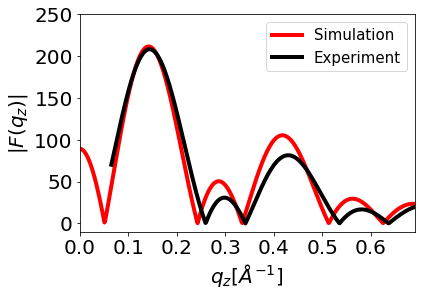

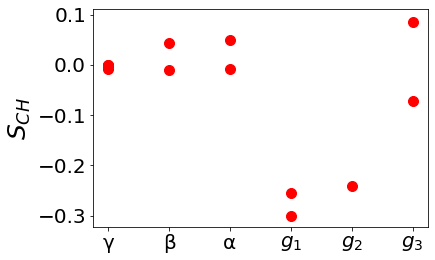

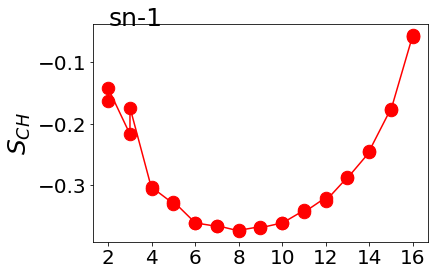

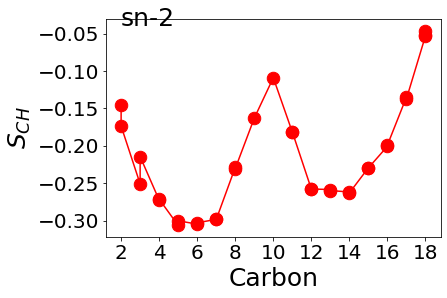

CHOL
DOI:  10.5281/zenodo.7022749
Form factor quality:  1.7338999999999993


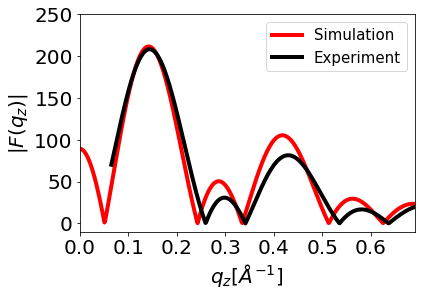

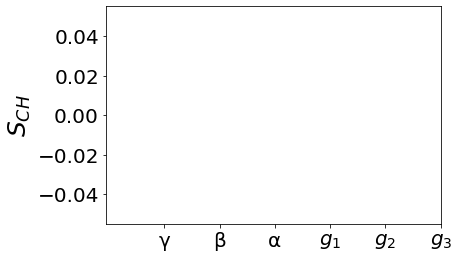

Plotting failed for  CHOL
min() arg is an empty sequence


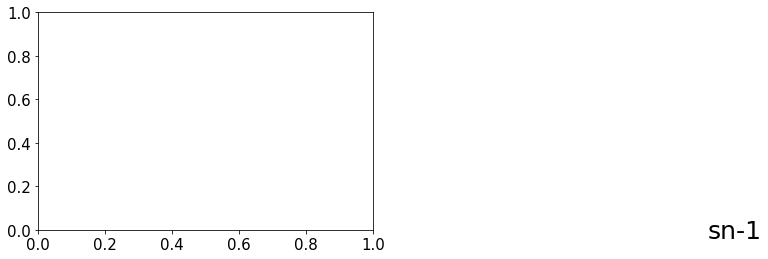

In [20]:
from DatabankLib.plottings import plotSimulation

## Membrane area per lipid, thickness, relative equilibration time, C-H bond order parameters
## and X-ray scattering form factors shown for the selected random simulation.
## We are doing all these things for a randomly picked system (loaded above).

APL = CalcAreaPerMolecule(system)
print('Membrane area per lipid:' , APL, '\n')

thickness = GetThickness(system)
print('Membrane thickness:' , thickness, '\n')

print('Relative equilibration time for each lipid in the simulation:')
ShowEquilibrationTimes(system)
print('\n')

print('Plot form factor and C-H bond order parameters from the simulation together with experimental data if available \n')
for lipid in system['COMPOSITION']:
    if lipid not in lipids_dict:
        continue
    print(lipid)
    try:
        plotSimulation(system, lipid)
    except Exception as e:
        print('Plotting failed for ', lipid)
        print(e)


# Selects a random simulation with the trajectory size below 100Mb and calculates P-N vector angle with respect to membrane normal for all lipids for which P and N atoms are available in headgroup

In [21]:
systems.loc(756)

{'DOI': '10.5281/zenodo.7572990',
 'SYSTEM': 'DPPC:C30(288:16)_T343K',
 'SOFTWARE': 'gromacs',
 'SOFTWARE_VERSION': 2018.7,
 'FF': 'CHARMM36',
 'FF_SOURCE': '10.5281/zenodo.15549',
 'TRJ': [['C36_16C30_288DPPC_70C_15w_traj_run3.xtc']],
 'TPR': [['C36_16C30_288DPPC_70C_15w_run3.tpr']],
 'PREEQTIME': 200,
 'TIMELEFTOUT': 0,
 'DIR_WRK': '/home/sosamuli/temp/DataBank/',
 'COMPOSITION': {'DPPC': {'NAME': 'DPPC',
   'MAPPING': 'mappingDPPCcharmm.yaml',
   'COUNT': [148, 140]},
  'C30': {'NAME': 'ALK', 'MAPPING': 'mappingC30H62.yaml', 'COUNT': [4, 12]},
  'SOL': {'NAME': 'SOL', 'MAPPING': 'mappingTIP3Pwater.yaml', 'COUNT': 4321}},
 'PUBLICATION': 'https://doi.org/10.1002/mats.202200078',
 'AUTHORS_CONTACT': 'Anika Wurl',
 'TRAJECTORY_SIZE': 2005650464,
 'TRJLENGTH': 100010.0,
 'TEMPERATURE': 343.0,
 'NUMBER_OF_ATOMS': 51875,
 'DATEOFRUNNING': '11/08/2023',
 'TYPEOFSYSTEM': 'lipid bilayer',
 'ID': 756,
 'EXPERIMENT': {'ORDERPARAMETER': {'DPPC': {}}, 'FORMFACTOR': {}},
 'path': '30e/6ee/30e6eed

In [22]:
## Print simulation specific

Patom_UNI = 'M_G3P2_M'   # universal name of phophate headgroup atom
Natom_UNI = 'M_G3N6_M'   # universal name of nitrogen headgroup atom


## Finding a random simulation with smaller than 100Mb trajectory for testing
for i in range(len(systems)):
    randomID = random.randint(1, len(systems))
    try:
        system = systems.loc(randomID)
    except KeyError:
        pass
    # This filters out larger than 100Mb trajectories for testing
    if system['TRAJECTORY_SIZE'] < 100000000:
        break

print('ID number of the selected simulation: ', randomID)

# Creates MDAnalysis universe from the simulation
# This will also download simulation files if not yet available locally
MDAuni = system2MDanalysisUniverse(system)

# Loops over molecules and calculates P-N vector angle if atoms are found
for molecule in system['COMPOSITION']:
    if molecule not in lipids_dict:
        continue
    print('\n Analysing ' + molecule)
    Patom_SIM = simulation2universal_atomnames(system,molecule,Patom_UNI)
    #print(Patom_SIM)
    Natom_SIM = simulation2universal_atomnames(system,molecule,Natom_UNI)
    #print(Natom_SIM)
    if Patom_SIM == None or Natom_SIM == None:
        continue

    #print(molecule, Patom_SIM, Natom_SIM)
    resname = system['COMPOSITION'][molecule]['NAME']
    PNangles = read_trj_PN_angles(resname, Patom_SIM, Natom_SIM, MDAuni)

    print('PN vector angle for ' + molecule + ':' + str(PNangles[2]) + ' +/- ' + str(PNangles[3]) + '\n')

ID number of the selected simulation:  648

 Analysing DOPC
PN vector angle for DOPC:70.86485997633739 +/- 0.10453500797403449


 Analysing CHOL


M_G3P2_M was not found from mappingCHOLESTEROLcharmm.yaml!M_G3N6_M was not found from mappingCHOLESTEROLcharmm.yaml!